### 1. [#responsibility] [appropriate LO for the make-up work] 
Take a screenshot of your CS110 dashboard on Forum


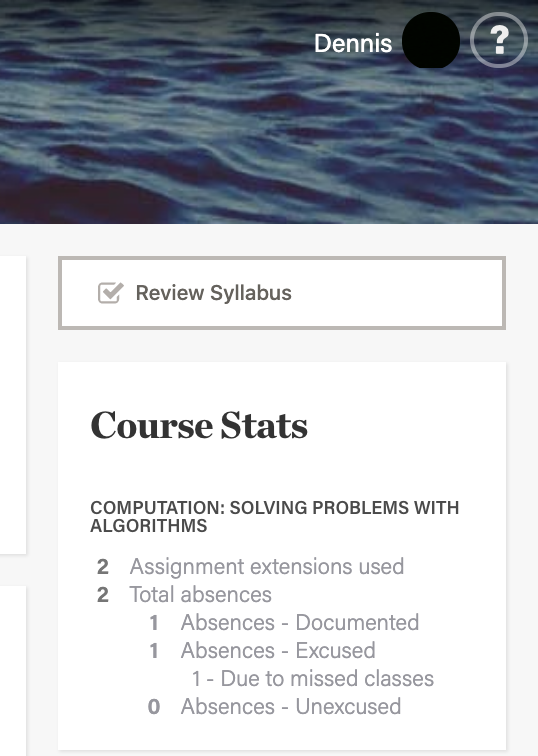

### 2. #ComputationalSolutions, #DataStructures, #ComplexityAnalysis
Give an overview of the functionality of CBFs, listing all its operations (i.e., from initialize to indexing keys with a given false-positive rate). Give a few examples of computational applications that, in your consideration, can benefit from using CBFs. For every computational application, give meaningful explanations as to why it is a good candidate for CBF.

### Bloom Filter
The counting bloom filter (CBF) is a variation of the bloom filter. The bloom filter is a space and time efficient data structure that is used to verify if an element -say object $x$ - potentially belongs to a larger set $S$. As such, it is a probabilistic data structure since it allows us to determine if an object is either **possibly** in the set or **definitely NOT** in the set. To put it more clearly, if we check if an item exists in the set the answers to expect would be "maybe yes" or "no". When quering for an element, bloom filters allow for false positives but do not allow for false negatives. Hash functions should also be independent and uniformly distributed. As it consists of a bit-list, the bloom filter uses **m** bits to represent **n** characters (the length **m** is proportional to the expected number of elements **n**) by using **k** independent hash functions and supports the following operations: test and add 

* **Test** - this checks if a given element is in the set or not. Has a constant time complexity
* **Add** - this adds an element into the set. Also has a constant time complexity

However, the bloom filter does not allow for the removal of an item. Since our set of elements contains 0s and 1s, if we were to attempt to delete a bit $x_{i}$, we might force a collision since other elements that we do not intend to delete can also hash to the same bit.

### Counting Bloom Filter
When we need the delete functionality, this is where the CBF is useful. Unlike in the Bloom filter where we store a bit-list, CBFs use positive integer-valued buckets. Most importantly, we increment the integer value by 1 each time we hash a value to it. This allows us to perform deletion by reducing the bucket counter by 1 for every deletion instance. The CBF contains the following operations:
* **Add**: For every hash function $h_i$, hash $x$ and obtain hash value $h_i(x)$. Then, For every hash value $h_i(x)$, retrieve the corresponding bucket in the CBF and then increase the bucket value by 1
* **Test**: For every hash function $h_i$, hash $x$ and obtain hash value $h_i(x)$. Then, For every hash value $h_i(x)$, retrieve the corresponding bucket in the CBF. When the bucket values are $\geq{0}$, we infer that the element is possibly in the CBF. If any of the values are zero, we can infer that the element is not in the CBF.
* **Delete**: We would first need to check if the element actually exists in the CBF because if it doesn't, there's no need to delete anything. For every hash function $h_i$, hash $x$ and obtain hash value $h_i(x)$. Then, For every hash value $h_i(x)$, retrieve the corresponding bucket in the CBF and then decrease each bucket value by 1

Given these characteristics, CBFs are ideal when (i) trying to check if an item exists in a set of similar items (ii) it is acceptable to risk getting false positives but not false negatives and (iii) our applications would benefit from a superior time and space complexity performace compared to other data structures. For example, although we could use a distributed hash based solution for the problem described above, it is compromising as it would consume a lot of space since the actual item would need to be stored internally. 

### Applications of the CBF
* Over the past two years, I've been keen to take advantage of the unlimited Google Drive storage we're offered at Minerva. Suffice to say, I have a tonne of documents and other material and often rely on the search function to quickly navigate to specific resources I'm looking for. In particular, it's really helpful when the search bar - in real time - presents a list of available options that match what I'm typing. I would imagine that they are using the Counting Bloom Filter for the cache that checks the availability of the document I'm searching for by searching the thousands of files stores on the cloud. Linear search and binary would be out of the question since given that I have about 150GB of files saved, it would take an unbearably long amount of time. On the other hand, when I get the result "item not found" after executing a CBF, we are certain that it does not exist thus no further searching is necessary. Also, a false positive would not be consequential and if I am certain that the document exists, I can use another type of search to confirm these results. The fact that the items that exists on my Drive constantly change, the add and delete operations are useful. This example shows the advantage of CBF with respect to space and time complexity.

* Since CBF are used to check memebership in a set and do not allow for false negatives, I would imagine using it in a database that contains all the attendees of a large event. Since we can know if someone has definitely not checked into the event or has probabky arrived at the event, we can use it to efficiently check for those people that are yet to arrive. Since it supports addition, we can quickly make changes in the event that we wrongly captured someone's information on the database and need to update it. In addition, when we formally receive an update that one of the attendees is no longer attending the event, we can quickly delete the entry.

### 3. #DataStructures, #PythonProgramming, #CodeReadability
Implement in Python 3 your designed CBFs data structure and all its properties. Make sure you carefully organize your Python code, write meaningful comments, and provide a thorough justification for your choice of hash functions. Meaning, why did you think a particular hash function is a good hash function in the context of CBFs.

In [1]:
#loading the required packages
import matplotlib.pyplot as plt
import random
import string
import time
import math

In [2]:
def create(n, p):
    """
    Function that creates an empty bloom filter and takes two parameters:
    the false positive rate (p) and number of elements to add (n)
    """
    # the optimal number of hash functions as defined in the following Wikipedia article
    # https://en.wikipedia.org/wiki/Bloom_filter
    size = int(-(n*math.log(p))//(math.log(2)**2)) #to make sure the value is an integer
    if size < 1:
        size = 1
    #returns an array of zero of optimal size
    return [0 for zero in range(size)]


def insert(cbf, word, __hash):
    """
    function that adds an element into our bloom filter. It iterates over 
    each hash function and increases the value in the corresponding bucket
    """
    N = len(cbf)
    for fctn in __hash:
        index = fctn(word) % N
        cbf[index] += 1
    return cbf
    

def contains(cbf, word, __hash):
    """
    function that iterates over all hash functions. If none of the indexes correspond
    to zero return "Probably yes". Otherwise, we're certain that the element is not in the set
    """
    N = len(cbf)
    for fctn in __hash:
        index = fctn(word) % N
        
        if cbf[index] == 0:
            return False
        
    return 'Probably yes'


def delete(cbf, word, __hash):
    """
    Function that determines if the item is in the bloom filter; 
    iterates over all hash functions and decreases all corresponding buckets by 1
    """
    N = len(cbf)
    
    for fctn in __hash:
        index = fctn(word) % N
        
        if cbf[index] == 0:
            raise Exception('Element not found in the Bloom Filter')
        else:
            cbf[index] -= 1
            
            
def create_hash_function(value):
    """
    Function that creates a hash function
    
    The choice of the following hash function is due to it's fewer collisions and 
    because words with the same letters have different has values,
    i.e "dennis" != "sinned"
    """
    def __hash(word):
        ans = 0
        for chr in word:
            ans = (ans * 128 + ord(chr)) + value
        return ans
    return __hash


def __generate_hash_f(p):
    """
    Function that returns the optimal number of hash functions given p
    Input: Our acceptable false positive rate
    """
    #find the ideal number of hash functions
    number_of_hashfunctions = int(- math.log(p,2))
    
    # When we have p (the probability of false positive rate) > 0.5, the number of hash functions is 0. 
    # Therefore we need to set the number of hash functions to 1
    if number_of_hashfunctions < 1:
        number_of_hashfunctions = 1
    
    function = []
    # we create another hash function, append it to
    # the list and return a list of multiple hash functions
    for i in range(0,number_of_hashfunctions):
        __hash = create_hash_function(i)
        function.append(__hash)
    return function

In [3]:
def random_word(length):
    """
    Random word generator
    """
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

In [4]:
#check that our hash functions give different outputs for two words with the same letters
function = __generate_hash_f(0.00000001)
hash_fnct_1 = []
hash_fnct_2 = []
for i in range(len(function)):
    hash_fnct_1.append(function[i]('dennis') % 100)
    hash_fnct_2.append(function[i]('sinned') % 100)
print(hash_fnct_1)
print(hash_fnct_2)

[71, 60, 49, 38, 27, 16, 5, 94, 83, 72, 61, 50, 39, 28, 17, 6, 95, 84, 73, 62, 51, 40, 29, 18, 7, 96]
[88, 77, 66, 55, 44, 33, 22, 11, 0, 89, 78, 67, 56, 45, 34, 23, 12, 1, 90, 79, 68, 57, 46, 35, 24, 13]


In [5]:
# check that we're generating a hash function
cbf = create(10,0.1)
__hash = __generate_hash_f(0.1)
for i in range(10):
    insert(cbf, random_word(10), __hash)
print(cbf)

#what happens when we try to delete an element that does not exist
delete(cbf, 'denis', __hash)

[0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0]


Exception: Element not found in the Bloom Filter

### 4.Using your own Python implementation from question 3, generate data to push into the CBFs. Provide an analysis, both on theoretical grounds and using experimental corroboration, of how your implementation scales in terms of:
* **[#DataStructures]** Memory size as a function of the false-positive rate
* **[#DataStructures]** Memory size as a function of the number of items stored
* **[#DataStructures, #ComplexityAnalysis]** Access time as a function of the
false-positive rate
* **[#DataStructures,#ComplexityAnalysis]** Access time as a function of the number
of items stored

### a) Memory Size as a function of the false-positive rate.
#### Theoretical Analysis:
We already know that the size of the bloom filter $m$ is given by:
$$m = -\frac{n\ln p}{(\ln2)^{2}} \Rightarrow \frac{m}{n} = -\frac{\ln p}{(\ln2)^{2}}$$
Therefore, when $n$ increases, $m$ also increases

#### Empirical Analysis:

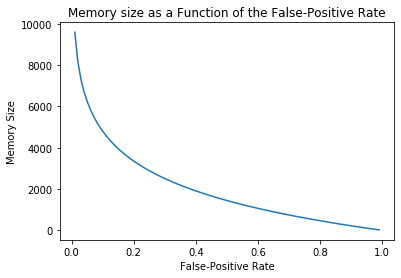

In [6]:
false_positive_rate = [n/100 for n in range(1,100)]
memory_size = []

#setting the input objects to 1000
n = 1000

# to find the optimal array size 
for p in false_positive_rate:
    cbf = create(n, p)
    memory_size.append(len(cbf))

#plotting memory size as a function of the false positive rate
plt.plot(false_positive_rate,memory_size)
plt.xlabel('False-Positive Rate')
plt.ylabel('Memory Size')
plt.title('Memory size as a Function of the False-Positive Rate')
plt.show()

We can see that the greater the false positive rate, the less the memory size used. This makes sense since when you think about it, if we allow for more false positives, we are essentially allowing for more collisions to happen. As a result, our array will be smaller thus requiring fewer bits

### b) Memory Size as a function of the Number of Items stored.
#### Theoretical Analysis
We know that: 
$$p \approx (1-e^{-kn/m})^k$$

Representing the equation in terms of m:
$$log_k(p) = 1-e^{-kn/m}$$
$$\Rightarrow e^{-kn/m} = 1 - log_k(p)$$
$$\Rightarrow -kn/m = \ln(1 - log_k(p))$$
$$\Rightarrow -m/kn = log_{1 - log_k(p)}e$$
$$\Rightarrow m = -kn*log_{1 - log_k(p)}e$$

When $k$ is positive, $log_{1 - log_k(pf)}\cdot e$ is negative because $0 < 1 - log_k(pf) < 1$. As a result, $-k*log_{1 - log_k(pf)}\cdot e$ is a positive constant such that when $n$ increases, $m = -kn*log_{1 - log_k(pf)}\cdot e$ increases as well. 

This makes sense since if we want to use a defined number of hash functions and set the false positive rate while maintaining the uniform distribution property, we would have to increase the memory to avoid collisions
#### Empirical Analysis

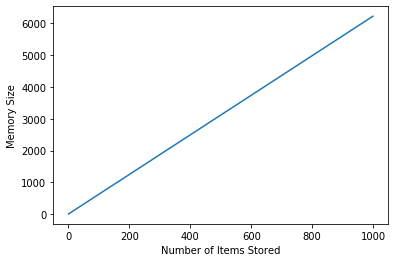

In [7]:
memory_size = []
number_of_items = [n for n in range(1,1000)]
false_positive_rate = 0.05 #fixes false positive rate at 0.05

for n in number_of_items:
    # initialize bloom filter for every memory size
    # this is because we cannot reuse it between trials
    cbf = create(n, false_positive_rate)
    memory_size.append(len(cbf))
    
plt.plot(number_of_items, memory_size)
plt.xlabel('Number of Items Stored')
plt.ylabel('Memory Size')
plt.show()

### c) Access Time as a function of the False Positive Rate.
#### Theoretical Analysis
The access time is dependent on the number of hash functions. Every time we check if an element has set membership, we must go through $k$ hash functions. Therefore, access time is linear to the number of hash functions ($O(k)$).

Let's assume we have $k$ such that it minimizes the probability of false positives:
$$k = \frac{m}{n}\ln 2$$
$$\frac{m}{n} = -\frac{\log_2p}{\ln 2} $$
$$\Rightarrow k = -\frac{\ln p}{\ln 2} = -log_2 p$$

This makes the ideal access time $O(log(p))$


#### Empirical Analysis

In [8]:
false_positive_rate = [n/100 for n in range(1,100)]
access_times = []
n = 10000 #setting the number of inserted elements 

#for each false positive rate
for p in false_positive_rate:
    
    # calling function to create bloom filter
    cbf = create(n, p)
    words = [random_word(10) for i in range(n)]
    # calling function to generate hash function
    __hash = __generate_hash_f(p)
    total_time = 0
    
    # inserts words into the bloom filter
    for word in words:
        insert(cbf, word, __hash)
    # meeasure how long it takes to run the contain function    
    start = time.time()
    for word in words:
        contains(cbf, word, __hash)
    end = time.time()
    total_time = (end-start)
    
    #append generated values to the access_times list
    access_times.append(total_time)

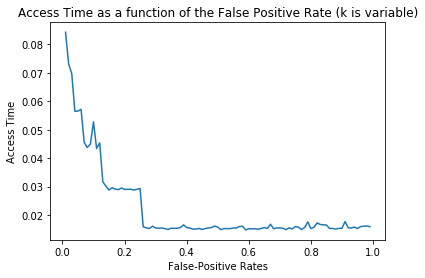

In [9]:
plt.plot(false_positive_rate, access_times)
plt.xlabel('False-Positive Rates')
plt.ylabel('Access Time')
plt.title('Access Time as a function of the False Positive Rate (k is variable)')
plt.show()

### d) Access Time as a function of the Number of Items Stored.
#### Theoretical Analysis
In (c), we saw that access time is linear to the number of hash functions and that when we represent access time as a function of the false positive rate (assuming we have a value of k that minimizes the probability of false positives). 

$$k = \frac{m}{n}\ln 2$$

When we keep $m$ constant, we get an inverse relationship between $k$ and $n$

#### Empirical Analysis

In [10]:
number_of_items = [n for n in range(1,1000)]
access_times = []
false_positive_rate = 0.5 #fixes the false positive rate at 0.5

# a loop function that creates a bloom filter for each item stored,
# and generates random words for each item that's stores then,
# generates hash functions
for n in number_of_items:
    cbf = create(n, false_positive_rate)
    words = [random_word(10) for i in range(n)]
    __hash = __generate_hash_f(p)
    
    total_time = 0
    
    # inserts words into the bloom filter
    for word in words:
        insert(cbf, word, __hash)
        
    # meeasure how long it takes to run the contain function   
    start = time.time()
    for word in words:
        contains(cbf, word, __hash)
    end = time.time()
    total_time = (end-start)
    
    # append generated values to the access_times list
    access_times.append(total_time)

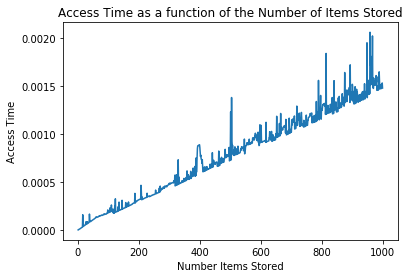

In [11]:
plt.plot(number_of_items, access_times)
plt.xlabel('Number Items Stored')
plt.ylabel('Access Time')
plt.title('Access Time as a function of the Number of Items Stored')
plt.show()

### 5. **[#ComputationalCritique]** 
Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate.

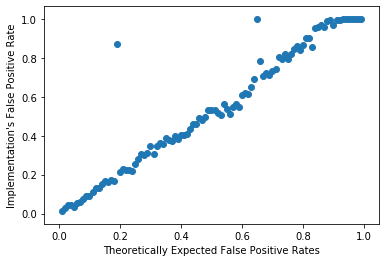

In [12]:
false_positive_rate = [n/100 for n in range(1,100)]
fpr_list = []
number_of_words = 1000

# loop function where for each false positive rate, we 
# create a bloom filter and generate hash functions

for p in false_positive_rate:
    cbf = create(number_of_words, p)
    __hash = __generate_hash_f(p)
    
    words_created = [random_word(10) for i in range(1000)]
    words_not_stored = [random_word(9) for i in range(1000)]
    
    #insert words in bloom filters
    for word in words_created:
        insert(cbf, word, __hash)

    #searches for words that shouldn't be in the bloom filter
    #else increment false_positives counter by 1 
    false_positives = 0
    for word in words_not_stored:
        if contains(cbf, word, __hash) != False:
            false_positives += 1
    
    # calculate our rate of false positives
    false_positives_over_words = false_positives / 1000
    fpr_list.append(false_positives_over_words)
    
plt.scatter(false_positive_rate, fpr_list)
plt.xlabel("Theoretically Expected False Positive Rates")
plt.ylabel("Implementation's False Positive Rate")
plt.show()

#### Empirical Analysis
Here, we observe a strong positive correlation between the theoretically expected false positive rate and our implemented false positive rate. Ergo, we can infer that our implementation matches the theoretical result. 

### 6. [#ComputationalCritique] Identify and list (if any) corner cases for CBFs.

In question 4(c), we concluded that the access time is constant relative to the false positive rate since access time is dependent only on the number of hash functions. However, there is a scenario where we vary the false positive rate by allowing k (the number of hash functions) to be a variable. Therefore, we may have a case where a linear change in k will result in a non-linear change in the false positive rate as seen in the figure in 4(c). 

## Appendix
### HC Applications
* #organization: ensured that the assignment was easy to follow by utilizing Jupyter cells, including comments on my Python code and providing appropriate justifications when required. 
* #soucequality: I consulted a wide range of high-quality material when doing research on counting bloom filters such as peer-reviewed academic papers, online lectures and expanatory online articles. This was to ensure that not only did my summary exhibit academic rigor but is also suitable for a general audience
* dataviz: plotted multiple graphs to serve as an empirical justification in question 4 with the required justification. I also followed best practices by choosing the appropriate variables and including labels

### References
Bloom Filters - Introduction and Python Implementation. (2018, February 8). Retrieved from https://www.geeksforgeeks.org/bloom-filters-introduction-and-python-implementation/.

Bloom filter. (2019, November 2). Retrieved from https://en.wikipedia.org/wiki/Bloom_filter#Counting_Bloom_filters.

Counting Bloom Filter in C . (n.d.). Retrieved from https://hackernoon.com/counting-bloom-filter-in-c-9672ec25b3ec.

Li, W., Huang, K., Zhang, D., & Qin, Z. (2013). Accurate Counting Bloom Filters for Large-Scale Data Processing. Mathematical Problems in Engineering, 2013, 1–11. doi: 10.1155/2013/516298

Probabilistic Data structures: Bloom filter. (n.d.). Retrieved from https://hackernoon.com/probabilistic-data-structures-bloom-filter-5374112a7832.

Singh, V. K. (2019, May 27). Bloom Filter : A Probabilistic Data Structure. Retrieved from https://medium.com/system-design-blog/bloom-filter-a-probabilistic-data-structure-12e4e5cf0638.

Talbot, J. (2015, July 15). What are Bloom filters? Retrieved from https://blog.medium.com/what-are-bloom-filters-1ec2a50c68ff.

